In [1]:
from drawdata import ScatterWidget

In [2]:
widget = ScatterWidget()

In [3]:
widget

ScatterWidget()

In [18]:
df = widget.data_as_pandas
df

,x,y,color,label
0,370.776195,253.367255,#1f77b4,a
1,372.662387,257.759506,#1f77b4,a
2,390.707577,262.379782,#1f77b4,a
3,390.134111,254.133983,#1f77b4,a
4,368.963078,272.559828,#1f77b4,a
...,...,...,...,...
817,195.493420,395.520668,#2ca02c,c
818,213.400639,390.326496,#2ca02c,c
819,202.576048,388.091201,#2ca02c,c
820,216.792404,397.659911,#2ca02c,c


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay

In [20]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

X = df[['x', 'y']].values
y = df['label_encoded'].values

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(n_jobs=-1),
    'Linear Support Vector Classifier': LinearSVC(),
    'Support Vector Classifier with RBF Kernel': SVC(kernel='rbf'),
    'K-Neighbors Classifier': KNeighborsClassifier()    
}


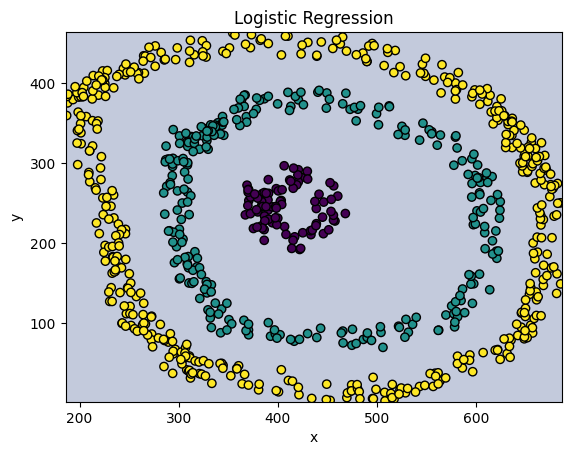

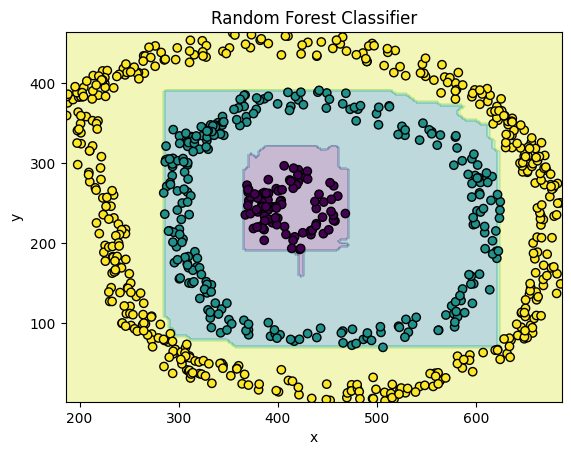

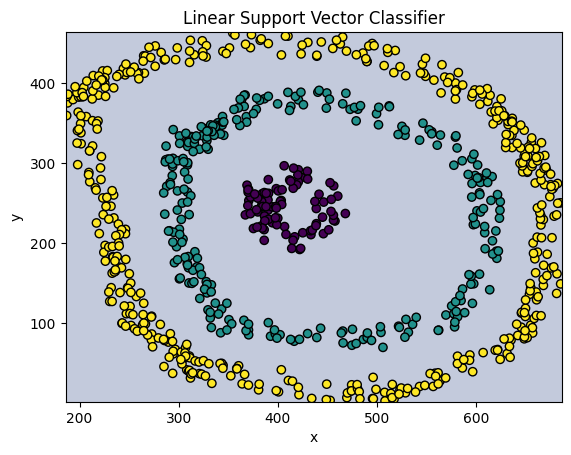

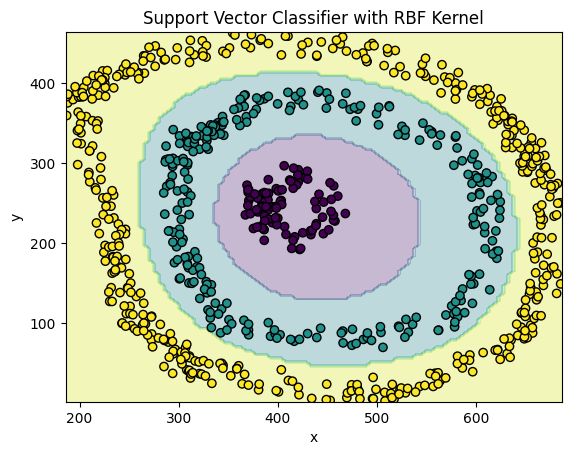

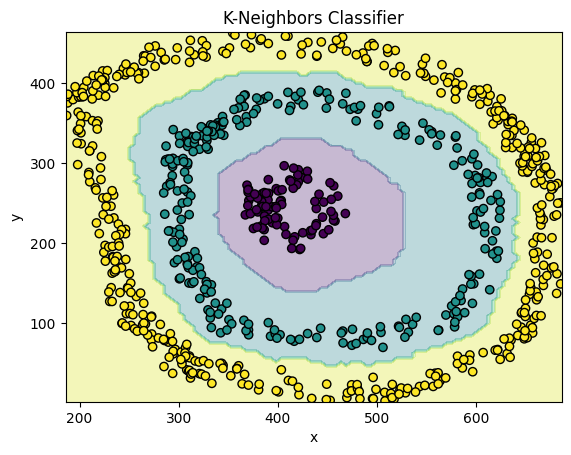

In [21]:
for name, clf in classifiers.items():
    clf.fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, X,
        response_method='predict',
        xlabel='x',
        ylabel='y',
        alpha=0.3
    )

    disp.ax_.scatter(X[: , 0], X[: , 1], c=y, edgecolors='k')
    disp.ax_.set_title(name)
    plt.show()

In [27]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# warnings.filterwarnings('ignore', category=ConvergenceWarning)

import ipywidgets
from IPython.display import HTML

In [31]:
widget3 = ScatterWidget()
output = ipywidgets.Output()

classifier_selector = ipywidgets.RadioButtons(
    options=['Logistic Regression', 'Random Forest', 'SVC Poly', 'SVC RBF'], 
    description='Classifier: ',
)

In [32]:
@output.capture(clear_output=True)
def on_change(change):
    df = widget3.data_as_pandas
    if len(df) and (df['color'].nunique() > 1):
        X = df[['x', 'y']].values
        y = df['color']
        display(HTML("<br><br><br>"))
        fig = plt.figure(figsize=(12, 12))

        if classifier_selector.value == 'Logistic Regression':
            classifier = LogisticRegression().fit(X, y)
        elif classifier_selector.value == 'SVC Poly':
            classifier = SVC(kernel='poly').fit(X, y)
        elif classifier_selector.value == 'SVC RBF':
            classifier = SVC(kernel='rbf').fit(X, y)
        else:
            classifier = RandomForestClassifier().fit(X, y)

        disp = DecisionBoundaryDisplay.from_estimator(
            classifier,
            X,
            response_method='predict', 
            xlabel='x',
            ylabel='y',
            alpha=0.5,
        )
        disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
        plt.title(f"{classifier.__class__.__name__}")
        plt.show()

In [33]:
widget3.observe(on_change, names=['data'])
classifier_selector.observe(on_change, names='value')
on_change(None)

ipywidgets.HBox([ipywidgets.VBox([widget3, classifier_selector]), output])

In [34]:
from drawdata import BarWidget

widget4 = BarWidget(collection_names=['usage', 'sunshine'], n_bins=24)

In [35]:
widget4

BarWidget(collection_names=['usage', 'sunshine'])

In [36]:
widget4.data_as_pandas

,collection,value,bin,color
0,usage,0.133094,0,#36A2EB
1,usage,0.253094,1,#36A2EB
2,usage,0.337094,2,#36A2EB
3,usage,0.453094,3,#36A2EB
4,usage,0.537094,4,#36A2EB
5,usage,0.581094,5,#36A2EB
6,usage,0.527094,6,#36A2EB
7,usage,0.437094,7,#36A2EB
8,usage,0.227094,8,#36A2EB
9,usage,0.171094,9,#36A2EB
